In [1]:
# Load in libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler as scaler

In [2]:
# Load in the data
raw_df = np.loadtxt(open("df_no_duplicates_clean.csv", "r"), delimiter = ',', dtype = str, skiprows = 0)

# Get the labels
df_labels = raw_df[0,1:]

# Make the dataframe
df = pd.DataFrame(raw_df[1:,1:], columns = df_labels)

# Convert to numeric values
df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)

# We're also going to check for any columns that are all zero. If this is the case, then the standard deviation
# will be zero, so we would be dividing by zero!
df.loc[:, (df == 0).all(axis=0)].head()

# dimensions of dataframe
print(np.shape(df.values))
df.head()

(630, 29)


,internal_id,avg_hardness,avg_yield,Al,B,C,Cr,Cu,Fe,Mn,...,lattice_constant,melting_point,specific_heat,atomic_mass,CTE,electrical_resistivity,atomic_radius,density_of_solid,poissons_ratio,max_min_radius
0,COME029,80,280,0,0,0,0,0,48,0,...,3.208,1765.36,0.443,57.3262,1.2632e-05,8.544e-08,1.374,8411.68,0.3004,0.05
1,COME051,333.5,827,0.5,0,0,19,0,18,0,...,3.2357,1890.73,0.437387,59.1281,1.08589e-05,9.3275e-08,1.36835,8286.12,0.29033,0.2
2,MINFM7375,114,415,0,0,0,17,0,67.0499,0,...,2.69553,1712.44,0.415431,50.9788,9.81689e-06,9.43999e-08,1.2847,7205.95,0.254945,0.05
3,MINFM7378,114,415,0,0,0,17,0,67.5899,0,...,2.71103,1722.21,0.417823,51.2804,9.88061e-06,9.49399e-08,1.29226,7248.47,0.256511,0.05
4,MINFM50412,85,275,0,0,0,22,0,57.8449,0,...,2.71615,1721.56,0.416773,50.7858,9.5117e-06,9.44249e-08,1.27983,7194.47,0.25115,0.05


In [3]:
data = scale(df.iloc[:,1:].values)
n_groups = 3
labels = df.iloc[:,0]

# Shape of data
print(np.shape(data))

(630, 28)


/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [4]:
# Run the skLearn kmeans model
reduced_data = PCA(n_components = 2).fit_transform(data)
kmeans = KMeans(init = 'k-means++', n_clusters = n_groups, n_init = 10)

print(reduced_data)

kmeans.fit(reduced_data)

[[-1.70805425  3.24988213]
 [ 0.02506766  2.28269027]
 [ 4.27810835 -0.12810379]
 ...
 [ 5.70040968 -1.68650374]
 [ 1.45377261 -1.59095212]
 [ 5.76388302 -1.17046419]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
# This should give us the "optimal" number of descriptors
optimal_num_dim = PCA(n_components = 'mle').fit_transform(data)
scaled_data = PCA(n_components = 28).fit_transform(data)

# The shape of the original data
print(np.shape(scaled_data))
# The "optimal" number of descriptors according to the MLE (maximum likelihood estimator)
print(np.shape(optimal_num_dim))
# Reduced data to two dimensions so that results are graphable
print(np.shape(reduced_data))

scaled_df = pd.DataFrame(scaled_data)

scaled_df.head()
#scaled_df.eq(pd.DataFrame(optimal_num_dim))
#log_df = scaled_df.head() == pd.DataFrame(optimal_num_dim).head()
#pd.DataFrame(reduced_data).head()
#pd.DataFrame(optimal_num_dim).head()
#print(log_df)

# From much messing around, I have determined that the "optimal" dimensions include every descriptor except for the last two, which in this
# case are max_min_radius and poisson's ratio
# If it is taking off the last two, then could it be that it always takes of the last two?

# Also, according to this stuff, the reduced_data is just graphing the first two 

(630, 28)
(630, 26)
(630, 2)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.708054,3.249876,0.573883,-0.909011,2.742821,5.021527,1.864712,1.186300,1.395759,-0.277452,...,-5.484414e-15,3.288826e-15,8.446227e-16,-2.872263e-15,2.962426e-15,-5.868722e-16,1.320309e-15,-1.749556e-16,-1.396909e-15,3.152532e-16
1,0.025068,2.282793,14.288599,-2.500643,20.072901,10.674491,-7.058313,-2.548424,3.379873,-0.765850,...,-8.892550e-16,-8.376934e-17,2.123313e-16,-1.089754e-16,-9.350214e-17,-1.743916e-16,-1.631021e-18,-1.755004e-16,1.676273e-16,-4.510622e-17
2,4.278108,-0.128104,-1.341004,-0.499973,0.192875,-0.319492,-0.277317,-0.416257,-0.379909,0.096762,...,8.446205e-15,9.434970e-15,1.860385e-15,5.015013e-15,2.126155e-15,1.531366e-15,1.798999e-15,1.000718e-15,1.582574e-15,2.951497e-16
3,3.882335,-0.306463,-1.209226,-0.475726,0.234031,-0.166281,-0.291173,-0.376770,-0.340002,0.065946,...,-2.317978e-16,3.688604e-15,2.598572e-15,2.018865e-15,-8.480079e-16,-9.969607e-16,-2.911098e-16,1.259280e-15,2.342437e-16,4.587013e-16
4,4.872684,-0.476977,-1.223116,-0.283386,0.211993,0.429794,-0.385454,-0.130402,-0.161712,0.139713,...,4.773437e-15,-8.497434e-16,-2.934951e-15,-1.818842e-15,1.472246e-15,-5.944543e-16,3.178451e-15,1.725577e-16,1.309384e-15,1.147880e-15


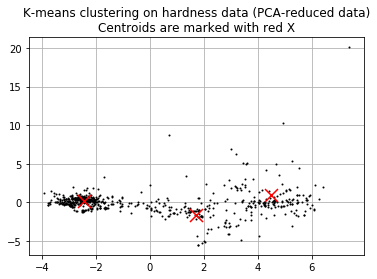

In [5]:
# Plot
plt.figure(1)
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)
plt.grid()
plt.title('K-means clustering on hardness data (PCA-reduced data)\n'
          'Centroids are marked with red X')
plt.show()